# data corruption effect on performance

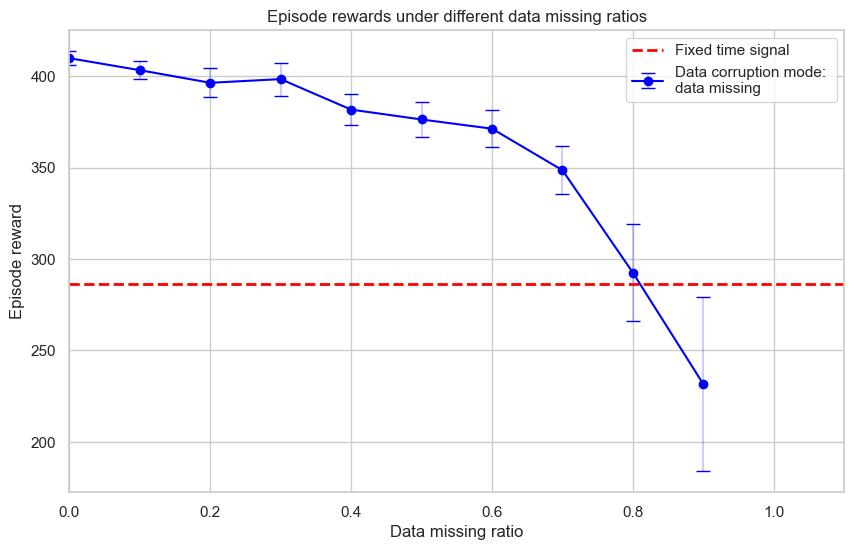

In [98]:
# data corruption effect on performance
# corruption mode: data missing
import matplotlib.pyplot as plt
import numpy as np

corruption_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
vehicle_missing_mean = [
     409.8629166666666,  # 0.0
     403.30447916666674,  # 0.1
     396.4007291666667,  # 0.2
     398.4011458333333,  # 0.3
     381.7394791666667,  # 0.4
     376.3256250000001,  # 0.5
     371.30281249999996,  # 0.6
     348.5780208333333,  # 0.7
     292.53666666666663,  # 0.8
     231.55927083333341,  # 0.9
     ]
vehicle_missing_std = [
    3.829108603794405,  # 0.0
    5.0368510416667,  # 0.1
    7.9236527912862185,  # 0.2
    8.967155333333702,  # 0.3
    8.437142545797576,  # 0.4
    9.623213333000054,  # 0.5
    10.045258008268842,  # 0.6
    13.250066782785062,  # 0.7
    26.440728065622366, # 0.8
    47.59302766017599, # 0.9
]

fixed_time_mean = [286.4295833333333]
fixed_time_std = [3.6766546413624526]
# 创建图形 
plt.figure(figsize=(10, 6))
# 绘制带误差条的折线图
plt.errorbar(corruption_ratio, vehicle_missing_mean, yerr=vehicle_missing_std, fmt='o-', capsize=5, color='blue', label='Data corruption mode: \ndata missing')
plt.axhline(y=fixed_time_mean[0], color='red', linestyle='--', linewidth=2, label="Fixed time signal")
#plt.errorbar([1.0], fixed_time_mean, yerr=fixed_time_std, fmt='o-', capsize=5, color='red', label='fixed time signal')
# Adjust error bar transparency separately
for line in plt.gca().collections:
    line.set_alpha(0.2)   # Set error bar transparency to 50%
plt.xlabel('Data missing ratio')
plt.xlim(0, 1.1)
plt.ylabel('Episode reward')
plt.title('Episode rewards under different data missing ratios')

plt.legend()
plt.show()

Fitted parameters: a = 395.827, b = 7.493
R-squared: 0.956


/var/folders/_n/_43f87557mj8l3dc37_34q8c0000gn/T/ipykernel_56315/3337514463.py:24: RuntimeWarning: overflow encountered in exp
  return a * (1 - np.exp(-b * x))


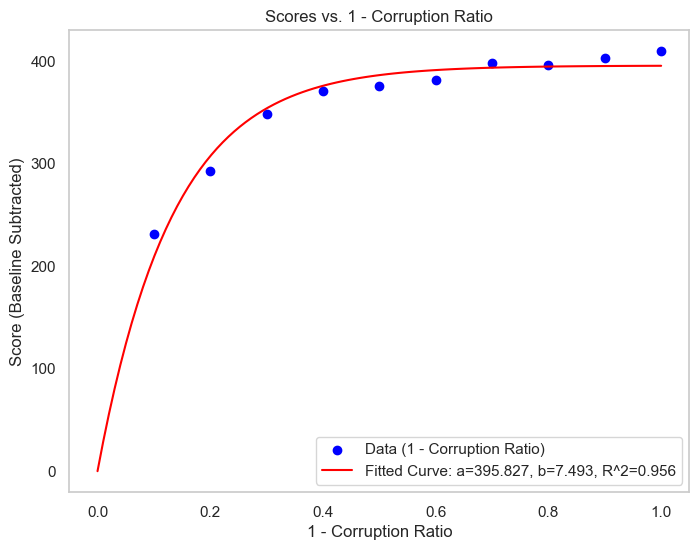

In [107]:
# curve fit
# curve fitting
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt


# Example data (replace with your actual data)
x_data = 1 - np.array(corruption_ratio)  # 1 - corruption ratio
y_data = np.array(vehicle_missing_mean)  # Performance scores (baseline subtracted)
y_max = y_data.max() # Performance scores
y_data = y_data
# Define the exponential CDF function
def exp_cdf(x, a, b):
    """
    Exponential cumulative distribution function.
    Args:
        x: Independent variable (1 - corruption ratio).
        a: Maximum score (upper bound).
        b: Growth rate parameter.
    Returns:
        Score at x.
    """
    return a * (1 - np.exp(-b * x))

# Fit the function to the data
params, covariance = curve_fit(exp_cdf, x_data, y_data, p0=[0.5, 1])  # Initial guesses: a=0.5, b=1

# Extract fitted parameters
a_fit, b_fit = params

# Generate fitted curve data for plotting
x_fit = np.linspace(0, 1, 100)  # Smooth x values for the fitted curve
y_fit = exp_cdf(x_fit, a_fit, b_fit)  # Fitted y values

# Calculate the quality of fit (R-squared)
residuals = y_data - exp_cdf(x_data, *params)  # Residuals
ss_res = np.sum(residuals**2)  # Residual sum of squares
ss_tot = np.sum((y_data - np.mean(y_data))**2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# Print fitted parameters and R-squared
print(f"Fitted parameters: a = {a_fit:.3f}, b = {b_fit:.3f}")
print(f"R-squared: {r_squared:.3f}")

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label="Data (1 - Corruption Ratio)", color="blue")
plt.plot(x_fit, y_fit, label=f"Fitted Curve: a={a_fit:.3f}, b={b_fit:.3f}, R^2={r_squared:.3f}", color="red")
plt.xlabel("1 - Corruption Ratio")
plt.ylabel("Score (Baseline Subtracted)")
plt.title("Scores vs. 1 - Corruption Ratio")
plt.legend()
plt.grid()
plt.show()

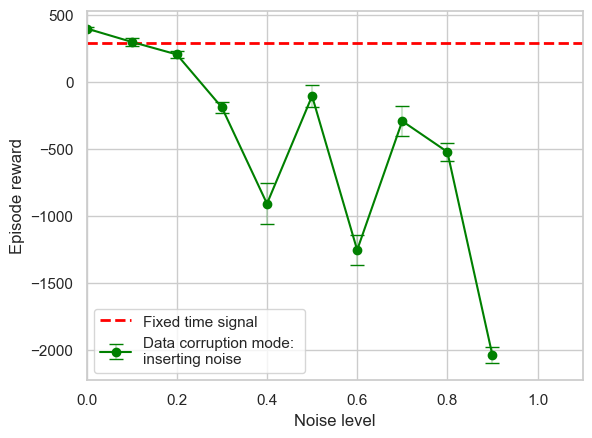

In [100]:
# data corruption effect on performance
# corruption mode: insert noise
# num_parallel_envs = 10
import matplotlib.pyplot as plt
import numpy as np

corruption_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
insert_noise_mean = [
     396.14854166666663,  # 0.0
     296.30437499999994,  # 0.1
     202.53479166666673,  # 0.2
     -193.12916666666666,  # 0.3
     -911.0076041666667,  # 0.4
     -107.65989583333328,  # 0.5
     -1256.619791666667,  # 0.6
     -294.68791666666664,  # 0.7
     -524.2527083333332,  # 0.8
     -2043.0482291666663,  # 0.9
]
insert_noise_std = [
    7.88832784493877,  # 0.0
    29.943805521441377,  # 0.1
    26.625252656762935,  # 0.2
    44.012169245183415,  # 0.3
    152.39994575402952,  # 0.4
    85.17861612720084,  # 0.5
    115.32179853261425,  # 0.6
    110.67151048048113,  # 0.7
    68.77704500277864, # 0.8
    59.94364277508621, # 0.9
]

fixed_time_mean = [286.4295833333333]
fixed_time_std = [3.6766546413624526]
# 创建图形 
#plt.figure(figsize=(8, 6))
# 绘制带误差条的折线图
plt.errorbar(corruption_ratio, insert_noise_mean, yerr=insert_noise_std, fmt='o-', capsize=5, color='green', label='Data corruption mode: \ninserting noise')
plt.axhline(y=fixed_time_mean[0], color='red', linestyle='--', linewidth=2, label="Fixed time signal")
#plt.errorbar([1.0], fixed_time_mean, yerr=fixed_time_std, fmt='o-', capsize=5, color='red', label='fixed time signal')
# Adjust error bar transparency separately
for line in plt.gca().collections:
    line.set_alpha(0.2)   # Set error bar transparency to 50%
plt.xlabel('Noise level')
plt.xlim(0, 1.1)
plt.ylabel('Episode reward')

plt.legend()
plt.show()


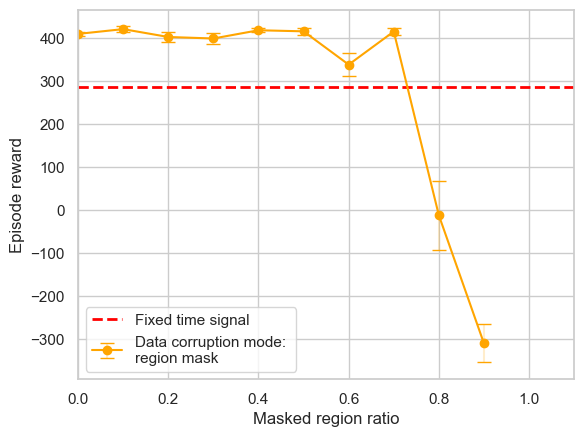

In [101]:
# data corruption effect on performance
# corruption mode: region mask
# num_parallel_envs = 20
import matplotlib.pyplot as plt
import numpy as np

corruption_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
region_mask_mean = [
     409.8629166666666,  # 0.0
     420.9525,  # 0.1
     402.6808333333332,  # 0.2
     399.1588541666668,  # 0.3
     418.3211458333332,  # 0.4
     415.81135416666655,  # 0.5
     338.4229166666668,  # 0.6
     415.3797916666666,  # 0.7
     -11.849583333333303,  # 0.8
     -309.6081250000001,  # 0.9
]
region_mask_std = [
    3.829108603794405,  # 0.0
    6.395512804128979,  # 0.1
    11.209683964471676,  # 0.2
    13.304453617374076,  # 0.3
    4.917160430494329,  # 0.4
    8.07541156273492,  # 0.5
    26.66638724625754,  # 0.6
    8.703516214027985,  # 0.7
    80.5845631385604, # 0.8
    44.12862486537148, # 0.9
]

fixed_time_mean = [286.4295833333333]
fixed_time_std = [3.6766546413624526]
# 创建图形 
#plt.figure(figsize=(8, 6))
# 绘制带误差条的折线图
plt.errorbar(corruption_ratio, region_mask_mean, yerr=region_mask_std, fmt='o-', capsize=5, color='orange', label='Data corruption mode: \nregion mask')
plt.axhline(y=fixed_time_mean[0], color='red', linestyle='--', linewidth=2, label="Fixed time signal")
#plt.errorbar([1.0], fixed_time_mean, yerr=fixed_time_std, fmt='o-', capsize=5, color='red', label='fixed time signal')
# Adjust error bar transparency separately
for line in plt.gca().collections:
    line.set_alpha(0.2)   # Set error bar transparency to 50%
plt.xlabel('Masked region ratio')
plt.xlim(0, 1.1)
plt.ylabel('Episode reward')

plt.legend()
plt.show()
